# Clase 1: Data Types

# Mi primer notebook

Esta es una celda markdown, para texto.

Esta es una fórmula fancy, usando sintaxis de LateX:  $ y_{i} = x^2$

Esto es un snippet de código (sólo lectura):

```python
# Esto es un comentario en python. La siguiente linea importa librería numpy
import numpy as np 

#Crear un objeto tipo int (numero entero)
n_int = 9 
# Crear un objeto tipo lista (vacia)
my_list = []
```

In [39]:
#Esta celda es para codigo
#Vamos a imprimir usando python un mensaje de "consola"
print('hello')

hello


## Tipos de objetos

<img src="https://image.slidesharecdn.com/datatypesinpython-210616122138/85/data-types-in-python-2-320.jpg?cb=1668970683"  width="300" height="300">

```python 
x = 3 #int
y = 3.0 #float
z = '3' #str
z = False #bool
a = [] #list
a = list() #list
a = () #tuple 
a = tuple() #tuple
b = {} #dict 
b = dict() #dict
```

In [45]:
#When in doubt : 
type(3 + 3)

int

In [55]:
# Crear 2 variables tipo float 
x, y = 5.4, 8.3
# Sumar x y y guardar en variable z 
z = x + y 

print('x: ', x , 'y: ', y , 'la suma de ambos es: ', z)
# Verificar si la palabra "hi" esta en variable p 
p = "hi, how's it going"
#p ?? 

# Verificar si es posible las sgtes operaciones
q1 = p + str(x) + str(y) 
q2 = 3 * p
#print(q2)
q3 = 'hello' + p 
q4 = 3 + 3.0 
#print(q4)


x:  5.4 y:  8.3 la suma de ambos es:  13.700000000000001
6.0


In [58]:
# Calcular promedio 
data_col = [50, 65, 65.4, 43.5] #list de elementos tipo int, float

# Promedio = sum of all observations / total number observations
num = sum(data_col) # 40 + 65 + 65.4 + 43.5 = float
den = len(data_col) # cuentame cuantos elementos tiene esa lista (4 elementos)
print('El numerador es : ', num, "\nEl denominador es: ", den)

avg = num / den 

print('El promedio es : ', avg )

El numerador es :  223.9 
El denominador es:  4
El promedio es :  55.975


### Funciones

$f(x)$

In [60]:
def cata_arithmetic_mean(data):
    num = sum(data)
    den = len(data)
    return num / den

In [62]:
data_col = [30, 34, 45.5, 35.34]
cata_arithmetic_mean(data_col)

36.21

In [64]:
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image
import astropy.units as u
%matplotlib inline

In [73]:
def in_a_galaxy_far_far_away(galaxy_name='NGC234', pixels=1024):
    im_size = 12 * u.arcmin
    im_pixels = pixels
    urlCutOut = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
    fuente = SkyCoord.from_name(galaxy_name) #NGC234
    print("Coordinates", fuente)
    query_string = urlencode(dict(ra=fuente.ra.deg,
                                dec=fuente.dec.deg,
                                width=im_pixels, 
                                height=im_pixels,
                                scale=im_size.to(u.arcsec).value/im_pixels))
    url = urlCutOut + '?' + query_string
    print(query_string)
    urlretrieve(url, "assets/"+galaxy_name+".jpg")
    return Image("assets/"+galaxy_name+".jpg")

In [ ]:
import galaxies 

galaxies.in_a_galaxy_far_far_away()

Coordinates <SkyCoord (ICRS): (ra, dec) in deg
    (10.88492397, 14.34261046)>
ra=10.884923971&dec=14.34261046439&width=512&height=512&scale=1.40625


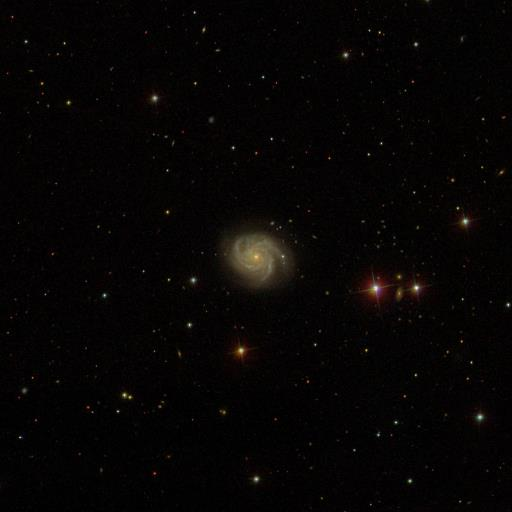

In [78]:
in_a_galaxy_far_far_away(galaxy_name='NGC234', pixels=512)

### HW (?)

Crear función para calcular Customer Lifetime value

$$ CLTV = \frac{AVG_{order value} \times Purchase_{freq}}{churn_{rate}} \times profit_{margin}$$

In [23]:
# Si no esta instalado pandas:
# !pip3 install pandas
# !pip3 install openpyxl
import pandas as pd 

# ! Ignorar esta parte (solo correr/ejecutar)

uk_data = pd.read_excel('../datasets/online_retail_uk.xlsx')
uk_data_group = pd.read_csv('../datasets/online_retail_uk_group.csv')

# Calculo de Average Order Value
uk_data_group['avg_order_value'] = uk_data_group['spent_money'] / uk_data_group['num_transactions']

# Calculo de Purchase Frequency 
purchase_frequency = sum(uk_data_group['num_transactions']) / uk_data_group.shape[0]

# Repeat Rate
repeat_rate = uk_data_group[uk_data_group.num_transactions > 1].shape[0] / uk_data_group.shape[0]

#Churn Rate
churn_rate = 1 - repeat_rate

# Profit Margin
uk_data_group['profit_margin'] = uk_data_group['spent_money'] * 0.05



In [ ]:
## Funcion para calcular Customer Lifetime Value
def compute_clv(avg_order=uk_data_group['avg_order_value'], purchase_frequency=purchase_frequency, churn_rate=churn_rate, profit_margin=uk_data_group['profit_margin']):
    """ Esta funcion te ayuda a calcular el CLV 
    (args)
    """
    uk_data_group['CLTV'] = 0 # Crear calculo aquí (borrar 0)
    return uk_data_group


In [80]:
compute_clv()
uk_data_group.to_excel('assets/cata_tarea.xlsx')

,CustomerID,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
0,12346.0,0,1,74215,77183.60,77183.600000,3859.1800
1,12747.0,366,103,1275,4196.01,40.737961,209.8005
2,12748.0,372,4596,25748,33719.73,7.336756,1685.9865
3,12749.0,209,199,1471,4090.88,20.557186,204.5440
4,12820.0,323,59,722,942.34,15.971864,47.1170
...,...,...,...,...,...,...,...
3916,18280.0,0,10,45,180.60,18.060000,9.0300
3917,18281.0,0,7,54,80.82,11.545714,4.0410
3918,18282.0,118,12,103,178.05,14.837500,8.9025
3919,18283.0,333,756,1397,2094.88,2.771005,104.7440
